# Statistical analysis movie reviews

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

movies = pd.read_csv('fandango_score_comparison.csv')
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


## Data Exploration

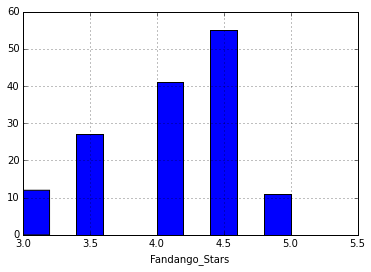

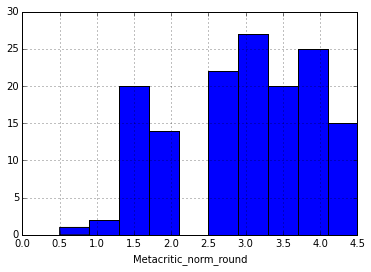

In [7]:
movies["Fandango_Stars"].hist()
plt.xlabel("Fandango_Stars")
plt.show()
movies["Metacritic_norm_round"].hist()
plt.xlabel("Metacritic_norm_round")
plt.show()

The reviews given by Fandango is really very high every movie has atleast scored a 3 which is very fishy. On the other hand Metacritic scores are evenly distributed.

## Mean, median and standard deviation

In [12]:
fandango_stars = movies["Fandango_Stars"]
metacritic_norm_round = movies["Metacritic_norm_round"]
# Mean

f_mean = fandango_stars.mean()
m_mean = metacritic_norm_round.mean()

# Median
f_median = fandango_stars.median()
m_median = metacritic_norm_round.median()

# Standard Deviation

f_std = fandango_stars.std()
m_std = metacritic_norm_round.std()

print("Means: ")
print("Fandango: ", f_mean)
print("Metacritic: ",m_mean)

print("\nMedian: ")
print("Fandango: ",f_median)
print("Metacritic: ",m_median)

print("\nStandard Deviation: ")
print("Fandango: ",f_std)
print("Metacritic: ",m_std)

Means: 
Fandango:  4.08904109589
Metacritic:  2.97260273973

Median: 
Fandango:  4.0
Metacritic:  3.0

Standard Deviation: 
Fandango:  0.540385977979
Metacritic:  0.990960561374


The median of Metacritic is 3.0 and mean 2.97 . Therefore 50% of the sample has a score of 3.0 or less and others are above 3.0.

The standard deviation of Fandango is lower that means that the scores are very closely packed and vary the least.

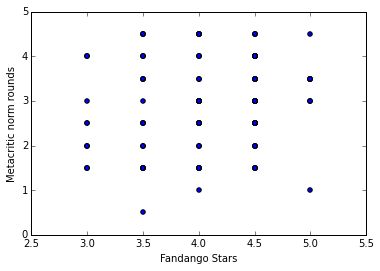

In [14]:
plt.scatter(fandango_stars, metacritic_norm_round)
plt.xlabel("Fandango Stars")
plt.ylabel("Metacritic norm rounds")
plt.show()

In [19]:
fm_diff = metacritic_norm_round - fandango_stars
movies["fm_diff"] = np.abs(fm_diff)
movies.sort(columns = "fm_diff")
movies[["FILM","fm_diff"]].head()

,FILM,fm_diff
0,Avengers: Age of Ultron (2015),1.5
1,Cinderella (2015),1.5
2,Ant-Man (2015),2.0
3,Do You Believe? (2015),4.0
4,Hot Tub Time Machine 2 (2015),2.0


In [22]:
movies[["Fandango_Stars","Metacritic_norm_round"]].corr(method = "pearson")

,Fandango_Stars,Metacritic_norm_round
Fandango_Stars,1.000000,0.178449
Metacritic_norm_round,0.178449,1.000000


There's a small yet positive correlation between the Fandango's rating and Metacritic scores. Therefore, the ratings are fairly independent.

In [25]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(metacritic_norm_round, fandango_stars)

#### Predicting the values of Fandango using linear regression

In [28]:
y1 = slope * 3.0 + intercept
print("Fandango stars: ", y1)

Fandango stars:  4.09170715282


So a movie which has scored a 3.0 on a metacritic scale will score a 4.0 on the Fandango scale. Which is very likely to be unusually higher.

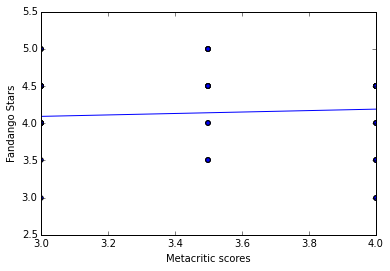

In [38]:
y2 = slope * 4.0 + intercept
plt.scatter(metacritic_norm_round, fandango_stars)
plt.plot([3,4],[y1,y2])
plt.xlim([3,4])
plt.xlabel("Metacritic scores")
plt.ylabel("Fandango Stars")
plt.show()